In [15]:
import pandas as pd
import numpy as np

# Charger le fichier CSV
df = pd.read_csv('csv/biens.csv')

# Vérification des premières lignes
df.head()

# Nombre de lignes (appartements)
n = 100

# Génération du dataset
data = {
    'surface': np.random.randint(30, 150, n),
    'nbRooms': np.random.randint(1, 6, n),
    'annee': np.random.randint(2005, 2025, n),
    'balcon': np.random.choice([True, False], n),
    'garage': np.random.choice([True, False], n),
    'note': np.random.randint(1, 6, n),
    'price_category': np.random.choice(['low', 'normal', 'high', 'scam'], n)
}

# Création du DataFrame
df = pd.DataFrame(data)

# Générer les données réalistes pour les colonnes demandées

# Ajout d'une colonne "annee" avec des années entre 2005 et 2024
df['annee'] = np.random.randint(2005, 2025, len(df))

# Ajout d'une colonne "balcon" avec des valeurs booléennes
df['balcon'] = np.random.choice([True, False], len(df))

# Ajout d'une colonne "garage" avec des valeurs booléennes
df['garage'] = np.random.choice([True, False], len(df))

# Ajout d'une colonne "note" avec des notes de 1 à 5
df['note'] = np.random.randint(1, 6, len(df))

# Ajout d'une colonne "price_category" avec des catégories de prix réalistes
df['price_category'] = np.random.choice(['low', 'normal', 'high', 'scam'], len(df))

# Vérification des premières lignes après l'ajout des colonnes
df.head()


df.to_csv('csv/biens.csv', index=False)

Surface moyenne: 92.23
Écart-type de la surface: 34.835502324815444
Surface minimale: 30
Surface maximale: 149
Année moyenne: 2014.22
Construction la plus ancienne: 2005
Construction la plus récente: 2024
Proportion d'appartements avec balcon: 57.99999999999999%
price_category
scam      30
low       27
high      23
normal    20
Name: count, dtype: int64
Moyenne des chambres: 3.04
Médiane des chambres: 3.0
Variance des chambres: 1.856969696969696
Écart-type des chambres: 1.3627067538431357


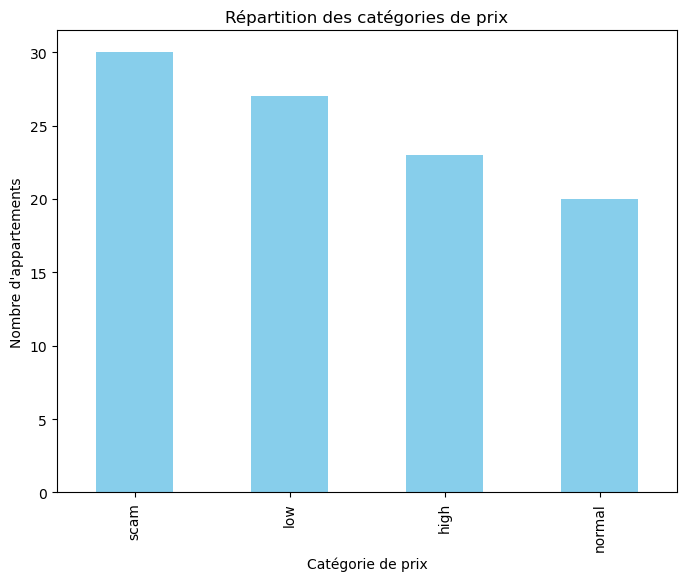

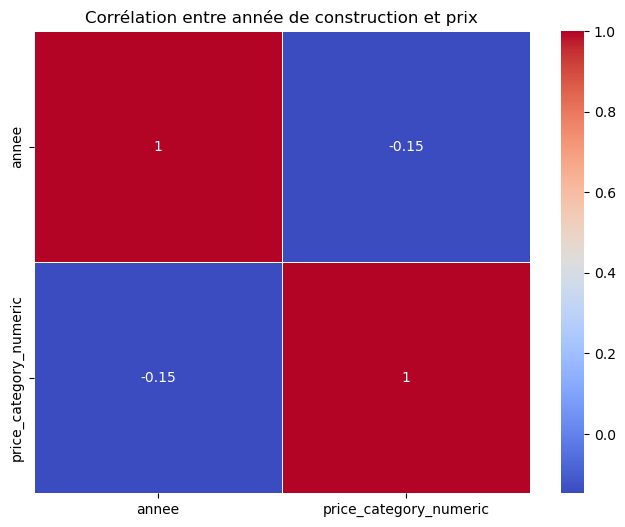

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# 3. Calculs statistiques avec Numpy et Pandas

# a. Surface : Moyenne, écart-type, surface minimale et maximale
surface_mean = df['surface'].mean()
surface_std = df['surface'].std()
surface_min = df['surface'].min()
surface_max = df['surface'].max()

print(f"Surface moyenne: {surface_mean}")
print(f"Écart-type de la surface: {surface_std}")
print(f"Surface minimale: {surface_min}")
print(f"Surface maximale: {surface_max}")

# b. Année : Moyenne, la plus ancienne, la plus récente
annee_mean = df['annee'].mean()
oldest_construction = df['annee'].min()
newest_construction = df['annee'].max()

print(f"Année moyenne: {annee_mean}")
print(f"Construction la plus ancienne: {oldest_construction}")
print(f"Construction la plus récente: {newest_construction}")

# c. Proportion d'appartements avec un balcon
balcon_proportion = df['balcon'].mean() * 100
print(f"Proportion d'appartements avec balcon: {balcon_proportion}%")

# d. Comptage du nombre d'appartements dans chaque catégorie de prix
price_category_count = df['price_category'].value_counts()
print(price_category_count)

# e. Nombre de chambres : Moyenne, médiane, variance, écart-type
nbRooms_mean = df['nbRooms'].mean()
nbRooms_median = df['nbRooms'].median()
nbRooms_variance = df['nbRooms'].var()
nbRooms_std = df['nbRooms'].std()

print(f"Moyenne des chambres: {nbRooms_mean}")
print(f"Médiane des chambres: {nbRooms_median}")
print(f"Variance des chambres: {nbRooms_variance}")
print(f"Écart-type des chambres: {nbRooms_std}")

# 4. Visualisations avec Matplotlib

# a. Diagramme à barres pour la répartition des catégories de prix
plt.figure(figsize=(8, 6))
df['price_category'].value_counts().plot(kind='bar', color='skyblue')
plt.title("Répartition des catégories de prix")
plt.xlabel("Catégorie de prix")
plt.ylabel("Nombre d'appartements")
plt.show()

# b. Heatmap : Correlation entre année de construction et prix
# On doit transformer les catégories de prix en valeurs numériques pour visualiser la corrélation.
price_mapping = {'low': 1, 'normal': 2, 'high': 3, 'scam': 4}
df['price_category_numeric'] = df['price_category'].map(price_mapping)

# Heatmap de la corrélation
plt.figure(figsize=(8, 6))
corr = df[['annee', 'price_category_numeric']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Corrélation entre année de construction et prix")
plt.show()


In [19]:
# Ajouter une colonne 'ville' avec les valeurs Lyon, Paris, Marseille
df['ville'] = np.random.choice(['Lyon', 'Paris', 'Marseille'], len(df))

# Vérification des premières lignes après l'ajout de la colonne ville
df.head()


,surface,nbRooms,annee,balcon,garage,note,price_category,price_category_numeric,ville
0,64,2,2007,False,False,1,high,3,Lyon
1,30,2,2020,True,False,1,low,1,Paris
2,77,2,2022,True,True,4,high,3,Marseille
3,148,2,2008,True,True,3,low,1,Paris
4,73,4,2015,True,False,4,high,3,Paris


In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Encoder la ville en variables numériques
df = pd.get_dummies(df, columns=['ville'], drop_first=True)

# Sélectionner les variables indépendantes (surface, ville, prix) et la variable dépendante (note)
X = df[['surface', 'price_category_numeric', 'ville_Paris', 'ville_Marseille']]  # Assurez-vous que price_category_numeric existe
y = df['note']

# Diviser les données en ensemble d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialiser et ajuster le modèle de régression linéaire
reg = LinearRegression()
reg.fit(X_train, y_train)

# Faire des prédictions
y_pred = reg.predict(X_test)

# Calculer le score R2
r2 = reg.score(X_test, y_test)
print(f"R2 Score: {r2}")


R2 Score: -0.07696093258753489


In [27]:
from sklearn.metrics import mean_squared_error

# Variables indépendantes (ville) et dépendante (année)
X = df[['ville_Paris', 'ville_Marseille']]
y = df['annee']

# Diviser les données en ensemble d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Régression linéaire
reg = LinearRegression()
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)

# Calculer le R2 et le RMSE
r2 = reg.score(X_test, y_test)
rmse = mean_squared_error(y_test, y_pred, squared=False)  # RMSE

print(f"R2: {r2}")
print(f"RMSE: {rmse}")


R2: -0.03470025646168051
RMSE: 6.2012264806951025


c:\Users\moham\.conda\envs\esgi\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, f1_score

# Variables indépendantes (ville et prix) et dépendante (garage)
X = df[['price_category_numeric', 'ville_Paris', 'ville_Marseille']]
y = df['garage']

# Diviser les données en ensemble d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Régression logistique
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

# Prédictions
y_pred = logreg.predict(X_test)

# Calcul des métriques
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")


Accuracy: 0.4666666666666667
Recall: 0.8461538461538461
F1 Score: 0.5789473684210527


In [30]:
from sklearn.neighbors import KNeighborsClassifier

# Variables indépendantes (ville et prix) et dépendante (balcon)
X = df[['price_category_numeric', 'ville_Paris', 'ville_Marseille']]
y = df['balcon']

# Diviser les données en ensemble d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Prédictions
y_pred = knn.predict(X_test)

# Calcul des métriques
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy (KNN): {accuracy}")
print(f"Recall (KNN): {recall}")
print(f"F1 Score (KNN): {f1}")


Accuracy (KNN): 0.36666666666666664
Recall (KNN): 0.4117647058823529
F1 Score (KNN): 0.42424242424242425


In [31]:
from sklearn.ensemble import RandomForestClassifier

# Random Forest classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Prédictions
y_pred_rf = rf.predict(X_test)

# Calcul des métriques
accuracy_rf = accuracy_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)

print(f"Accuracy (Random Forest): {accuracy_rf}")
print(f"Recall (Random Forest): {recall_rf}")
print(f"F1 Score (Random Forest): {f1_rf}")


Accuracy (Random Forest): 0.43333333333333335
Recall (Random Forest): 0.6470588235294118
F1 Score (Random Forest): 0.5641025641025641
